In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe

In [3]:
data_frame = pd.read_excel('dataset1.xlsx')
data_frame

,Les,Jurusan,Nilai_Penjurusan,Nilai_Pokok,Jarak_Tempuh,PRESTASI
0,Tidak,MIPA,Amat Baik,Baik,4,1
1,Tidak,MIPA,Baik,Baik,2,1
2,Tidak,MIPA,Baik,Baik,2,0
3,Tidak,MIPA,Baik,Baik,1,0
4,Ya,MIPA,Baik,Baik,3,0
...,...,...,...,...,...,...
95,Tidak,MIPA,Baik,Baik,1,1
96,Tidak,MIPA,Baik,Baik,8,0
97,Ya,MIPA,Baik,Baik,1,0
98,Tidak,MIPA,Baik,Baik,2,0


In [5]:
predictors = data_frame.drop(columns='PRESTASI')
targets = data_frame.PRESTASI
x_train, x_test, y_train, y_test = train_test_split(predictors, targets, test_size=.2, random_state=0)

print('x_train = ', x_train.shape)
print('x_test = ', x_test.shape)
print('y_train = ', y_train.shape)
print('y_test = ', y_test.shape)

x_train =  (80, 5)
x_test =  (20, 5)
y_train =  (80,)
y_test =  (20,)


In [6]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(),['Jarak_Tempuh']),
    ('categoric', cat_pipe(encoder='onehot'),['Les','Jurusan','Nilai_Penjurusan','Nilai_Pokok'])
])

In [7]:
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline ([
    ('prep', preprocessor),
    ('algo', GaussianNB())
])

In [8]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Jarak_Tempuh']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Les', 'Jurusan',
                                                   'Nilai_Penjurusan',
                                                   'Nilai_Pokok'])])),
               

In [9]:
pipeline.score(x_train, y_train)

0.825

In [10]:
pipeline.score(x_test, y_test)

0.9

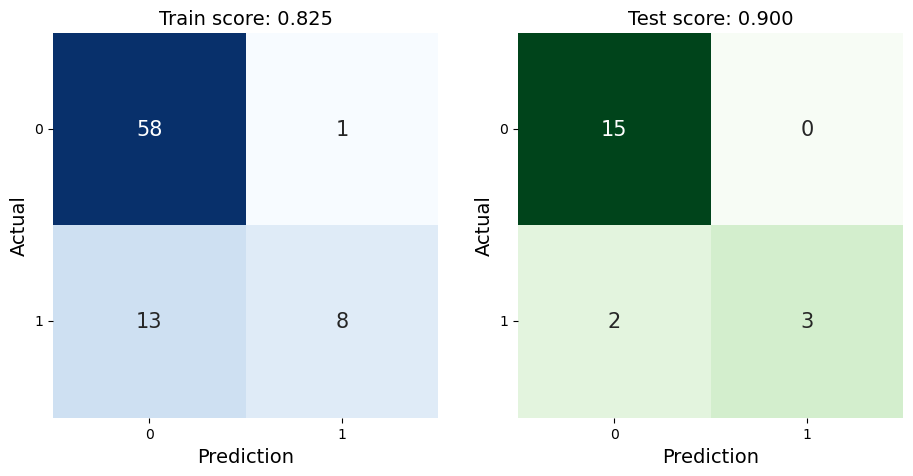

In [11]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(x_train, y_train, x_test, y_test, pipeline)

In [12]:
prediction = pd.read_excel('testing.xlsx')
prediction

,Les,Jurusan,Nilai_Penjurusan,Nilai_Pokok,Jarak_Tempuh
0,Tidak,MIPA,Amat Baik,Baik,4


In [13]:
pipeline.predict(prediction)

array([1], dtype=int64)

In [14]:
prediction['PRESTASI'] = pipeline.predict(prediction)
prediction

,Les,Jurusan,Nilai_Penjurusan,Nilai_Pokok,Jarak_Tempuh,PRESTASI
0,Tidak,MIPA,Amat Baik,Baik,4,1
